In [3]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Load Libraries:

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import activations

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import models
from tensorflow.keras import layers

import cv2
import numpy as np
from tqdm import tqdm
import math
import os

import matplotlib.pyplot as plt

#Load Model:

In [5]:
work_dir = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/Records/"

In [6]:
checkpointer_name = "best_weights.MalayaKew.Original.rgb.(256, 256).DataFlow.pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5"


In [7]:
model_loaded = load_model(work_dir+checkpointer_name)
print("Loaded "+work_dir+checkpointer_name+".")

Loaded drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/Records/best_weights.MalayaKew.Original.rgb.(256, 256).DataFlow.pad0.TransferLearning3D.DenseNet201.wInit.imagenet.TrainableAfter.allDefault.Dense.1024.1024.2048.actF.elu.opt.Adam.drop.0.5.batch16.Flatten.l2.0.001.run_1.hdf5.


In [8]:
model_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

#Model Layers:

In [9]:
layer_names = [] # conv4_block48_2_conv, conv3_block12_2_conv

for layer in model_loaded.layers:
  layer_names.append(layer.name)
print(layer_names)

['input_1', 'zero_padding2d', 'conv1/conv', 'conv1/bn', 'conv1/relu', 'zero_padding2d_1', 'pool1', 'conv2_block1_0_bn', 'conv2_block1_0_relu', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_concat', 'conv2_block2_0_bn', 'conv2_block2_0_relu', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_concat', 'conv2_block3_0_bn', 'conv2_block3_0_relu', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_concat', 'conv2_block4_0_bn', 'conv2_block4_0_relu', 'conv2_block4_1_conv', 'conv2_block4_1_bn', 'conv2_block4_1_relu', 'conv2_block4_2_conv', 'conv2_block4_concat', 'conv2_block5_0_bn', 'conv2_block5_0_relu', 'conv2_block5_1_conv', 'conv2_block5_1_bn', 'conv2_block5_1_relu', 'conv2_block5_2_conv', 'conv2_block5_concat', 'conv2_block6_0_bn', 'conv2_block6_0_relu', 'conv2_block6_1_conv', 'conv2_block6_1_bn', 'conv2_block6_1_relu', 'conv

In [10]:
layer_no = -9
print(f"layer_names[{layer_no}] = {layer_names[layer_no]}")

layer_names[-9] = relu


#By Loading Entire Test at Once:

In [10]:
input_path = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/"
filename = "D2_Plant_Leaf_MalayaKew_MK_impl_1_Original_RGB_test_X.pkl.npy"

In [11]:
#input_test = np.load(f"{input_path}{filename}", allow_pickle=True)

In [12]:
print(f"input_test.shape = {input_test.shape}")

input_test.shape = (8800, 256, 256, 3)


In [ ]:
layer_outputs = [layer.output for layer in model_loaded.layers]
activation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)
activations = activation_model.predict(input_test)

#By Loading Single at a Time:

In [11]:
root_path = "drive/My Drive/Plant_Leaf_MalayaKew_MK_Dataset/MK/D2/test_patch/"
#num_classes = 44
#list_classes = [f"Class{i+1}" for i in range(num_classes)]
list_classes = [f"Class{i}" for i in [1,11,22,33,44]]
list_input_path = []
for class_name in list_classes:
    list_input_path.append(f"{root_path}{class_name}/")
print(f"len(list_input_path) = {len(list_input_path)}")

len(list_input_path) = 5


In [12]:
os.listdir(list_input_path[0])[0]

'Class1(1)R135_00023.jpg'

In [13]:
list_full_paths = []
for input_path in list_input_path:
    filename = os.listdir(input_path)[0]
    list_full_paths.append(f"{input_path}{filename}")
print(f"len(list_full_paths) = {len(list_full_paths)}")

len(list_full_paths) = 5


In [14]:
'''
filename = "Class44(8)R315_00277.jpg"

test_image = cv2.imread(f"{input_path}{filename}")
print(f"test_image.shape = {test_image.shape}")

input_test = np.expand_dims(test_image, 0)
print(f"input_test.shape = {input_test.shape}")
#'''

'\ntest_image = cv2.imread(f"{input_path}{filename}")\nprint(f"test_image.shape = {test_image.shape}")\n\ninput_test = np.expand_dims(test_image, 0)\nprint(f"input_test.shape = {input_test.shape}")\n#'

In [14]:
list_test_images = []

for file_full_path in list_full_paths:
    test_image = cv2.imread(f"{input_path}{filename}")
    list_test_images.append(test_image)
    
np_test_images = np.array(list_test_images)
print(f"np_test_images.shape = {np_test_images.shape}")

np_test_images.shape = (5, 256, 256, 3)


#Get Layer Activation Outputs:

In [15]:
layer_outputs = [layer.output for layer in model_loaded.layers]
activation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)
#activations = activation_model.predict(input_test)

In [30]:
list_activations = []
for test_image in tqdm(np_test_images):
    activations = activation_model.predict(np.array([test_image]))
    list_activations.append(activations)
print(f"len(list_activations) = {len(list_activations)}")

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

len(list_activations) = 5


##Visualize:

In [17]:
'''
pool2_pool(32p,128), pool2_conv(64p), zero_padding2d_1(130p,64), pool3_relu(32p,512), conv3_block12_concat(32p,512)
'''
#target_layer_name = "conv3_block12_concat" 
list_target_layer_names = ['zero_padding2d_1', 'pool2_conv', 'pool2_pool', 'conv3_block12_concat', 'pool3_relu']
list_layer_indices = []

for target_layer_name in list_target_layer_names:
    for target_layer_index in range(len(layer_names)):
        if layer_names[target_layer_index]==target_layer_name:
            #layer_no = target_layer_index
            list_layer_indices.append(target_layer_index)

#print(f"layer_names[{layer_no}] = {layer_names[layer_no]}")
print(f"list_layer_indices = {list_layer_indices}")

list_layer_indices = [5, 51, 52, 136, 138]


In [ ]:
'''
current_layer = activations[layer_no]
num_neurons = current_layer.shape[1:][-1]

print(f"current_layer.shape = {current_layer.shape}")
print(f"image_dimension = {current_layer.shape[1:][:-1]}")
print(f"num_neurons = {num_neurons}")
#'''

In [29]:
len(activations)

715

In [34]:
list_current_layers = []
list_num_neurons = []

for activations in list_activations:
    list_activations_layers = []
    list_neurons = []
    for layer_no in list_layer_indices:
        current_layer = activations[layer_no]
        list_activations_layers.append(current_layer)
        list_neurons.append(current_layer.shape[1:][-1])
    list_current_layers.append(list_activations_layers)
    list_num_neurons.append(list_neurons)

print(f"len(list_current_layers) = {len(list_current_layers)}")
print(f"len(list_current_layers[0]) = {len(list_current_layers[0])}")
print(f"list_num_neurons = {list_num_neurons}")

len(list_current_layers) = 5
len(list_current_layers[0]) = 5
list_num_neurons = [[64, 128, 128, 512, 512], [64, 128, 128, 512, 512], [64, 128, 128, 512, 512], [64, 128, 128, 512, 512], [64, 128, 128, 512, 512]]


In [39]:
np.array(list_current_layers[0][0]).shape

(1, 130, 130, 64)

In [236]:
'''
supported cmap values are: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 
'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 
'nipy_spectral_r', 'ocean', 'oc...
'''

"\nsupported cmap values are: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', \n'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', \n'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', \n'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', \n'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', \n'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', \n'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', \n'c

In [ ]:
#plt.matshow(current_layer[0, :, :, -1], cmap ='PiYG')
#plt.matshow(current_layer[0, :, :, -1], cmap ='viridis')

In [ ]:
'''
superimposed_activation_image = current_layer[0, :, :, 0]
for activation_image_index in range(1, num_neurons):
    current_activation_image = current_layer[0, :, :, activation_image_index]
    #superimposed_activation_image = np.multiply(superimposed_activation_image, current_activation_image) # elementwise multiplication
    superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition
plt.imshow(superimposed_activation_image, cmap='viridis')
#'''

In [42]:
list_superimposed_activation_images = []

for layer_index in range(len(list_current_layers)):
    for current_layer_index in range(len(list_current_layers[layer_index])):
        current_layer = list_current_layers[layer_index][current_layer_index]
        num_neurons = list_num_neurons[layer_index][current_layer_index]

        superimposed_activation_image = current_layer[0, :, :, 0]
        for activation_image_index in range(1, num_neurons):
            current_activation_image = current_layer[0, :, :, activation_image_index]
            superimposed_activation_image = np.add(superimposed_activation_image, current_activation_image) # elementwise addition
        list_superimposed_activation_images.append(superimposed_activation_image)

print(f"len(list_superimposed_activation_images) = {len(list_superimposed_activation_images)}")

len(list_superimposed_activation_images) = 25


In [59]:
len(list_superimposed_activation_images)

25

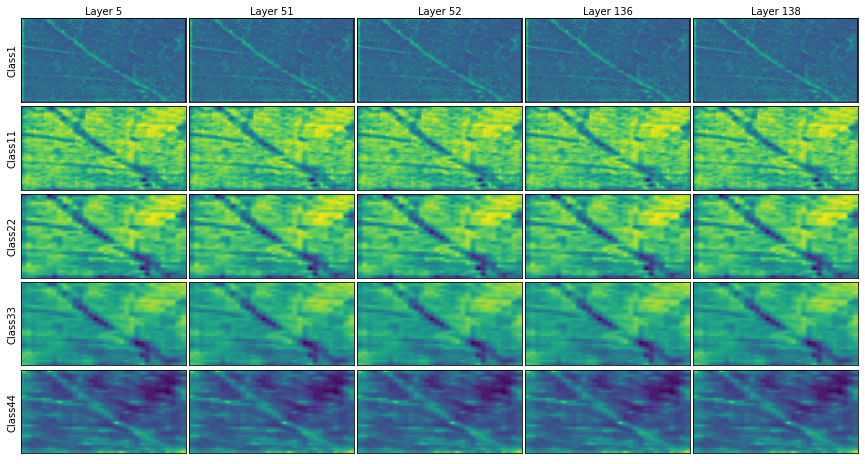

In [71]:
sub_fig_num_rows = len(list_target_layer_names)
sub_fig_num_cols = len(list_current_layers)
fig_heigth = 8
fig_width = 15
cmap = "viridis" # PuOr_r, Dark2_r, RdBu, RdBu_r, coolwarm, viridis, PiYG, gray

fig, axes = plt.subplots(sub_fig_num_rows,sub_fig_num_cols, figsize=(fig_width,fig_heigth))
#plt.suptitle(f"Layer {str(layer_no+1)}: {layer_names[layer_no]} {str(current_layer.shape[1:])}", fontsize=20, y=1.1)

for i,ax in enumerate(axes.flat):
    row = i//sub_fig_num_cols
    col = i%sub_fig_num_cols

    ax.imshow(list_superimposed_activation_images[row], cmap =cmap) 
    ax.set_xticks([])
    ax.set_yticks([])
    if col == 0:
        ax.set_ylabel(f"{list_classes[row]}")
    if row == 0:
        ax.set_xlabel(f"Layer {str(list_layer_indices[col])}") # , rotation=0, ha='right'
        #ax.set_xlabel(f"Layer {str(list_layer_indices[col])}: {str(list_target_layer_names[col])}") # , rotation=0, ha='right'
        ax.xaxis.set_label_position('top')
    ax.set_aspect('auto')

plt.subplots_adjust(wspace=0.02, hspace=0.05)

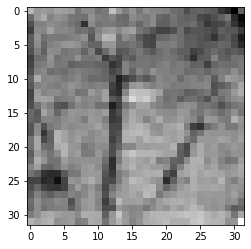

In [239]:
# good cmap for this work: PuOr_r, Dark2_r, RdBu, RdBu_r, coolwarm, viridis, PiYG
'''
for activation_image_index in range(num_neurons):
    plt.imshow(current_layer[0, :, :, activation_image_index], cmap='PiYG')
#'''
plt.imshow(superimposed_activation_image, cmap='gray')

#Weight Visualization:

In [13]:
layer_outputs = [layer.output for layer in model_loaded.layers]
#activation_model = models.Model(inputs=model_loaded.input, outputs=layer_outputs)
#activations = activation_model.predict(input_test)

In [20]:
layer_configs =  []
layer_weights = []

for layer in model_loaded.layers:
    layer_configs.append(layer.get_config())
    layer_weights.append(layer.get_weights())
    
print(f"len(layer_configs) = {len(layer_configs)}")
print(f"len(layer_weights) = {len(layer_weights)}")

len(layer_configs) = 715
len(layer_weights) = 715


In [22]:
layer_configs[-9]

{'activation': 'relu', 'dtype': 'float32', 'name': 'relu', 'trainable': True}

In [56]:
layer_name = 'conv2_block1_1_conv' # conv5_block32_1_conv
model_weight = model_loaded.get_layer(layer_name).get_weights()[0]
#model_biases = model_loaded.get_layer(layer_name).get_weights()[1]

In [57]:
print(f"type(model_weight) = {type(model_weight)}")
print(f"model_weight.shape = {model_weight.shape}")

type(model_weight) = <class 'numpy.ndarray'>
model_weight.shape = (1, 1, 64, 128)


In [58]:
model_weight[0][0].shape

(64, 128)

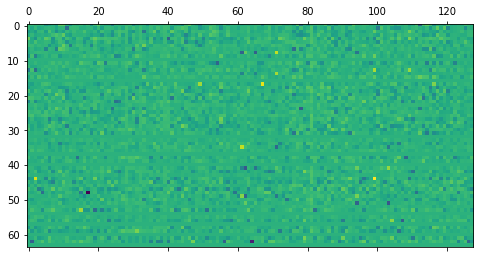

In [59]:
plt.matshow(model_weight[0, 0, :, :], cmap ='viridis')